# ARIMA

In [2]:
import numpy as np
import pandas as pd

#Los siquientes paquetes son necesarios para la carga de las metricas con las cuales vamos a revisar el desempeño del modelo

from sklearn import metrics
from math import sqrt

#Los siguientes paquetes son necesarios para la generación de graficas

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import time
import itertools

#Los siguientes paquetes son aquellos necesarios para la ejecución de modelos ARIMA

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

## Carga de Datos

En las siguientes celdas veremos algunas funciones para la carga de datos

In [6]:
df = pd.read_excel('DataT.xlsx') #Para el uso de esta función tal y como aparece aqui escrita es necesario que el conjunto
                                 #de datos se encuentre en la misma carpeta que el notebook

In [7]:
df = df.set_index('Primera fecha: Date') #La siguiente linea asigna la fecha como el indice del dataframe

In [8]:
df #Imprime el dataframe

,Año,Mes,Suma de TOTAL
Primera fecha: Date,,,
2019-01-01,2019,enero,1691927520
2019-02-01,2019,febrero,1480358712
2019-03-01,2019,marzo,1382603191
2019-04-01,2019,abril,1450589065
2019-05-01,2019,mayo,1103728361
2019-06-01,2019,junio,3953957613
2019-07-01,2019,julio,4736759134
2019-08-01,2019,agosto,3920618050
2019-09-01,2019,septiembre,4533191592


In [9]:
x = df.index
y = df["Suma de TOTAL"]

In [10]:
x

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01'],
              dtype='datetime64[ns]', name='Primera fecha: Date', freq=None)

In [11]:
df

,Año,Mes,Suma de TOTAL
Primera fecha: Date,,,
2019-01-01,2019,enero,1691927520
2019-02-01,2019,febrero,1480358712
2019-03-01,2019,marzo,1382603191
2019-04-01,2019,abril,1450589065
2019-05-01,2019,mayo,1103728361
2019-06-01,2019,junio,3953957613
2019-07-01,2019,julio,4736759134
2019-08-01,2019,agosto,3920618050
2019-09-01,2019,septiembre,4533191592


## Visualizacion de la Serie

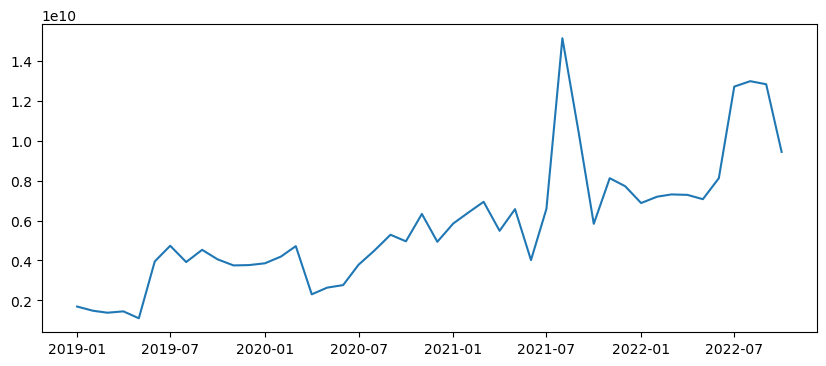

In [12]:
fig, ax1 = plt.subplots(figsize = (10, 4))

#ax1 = plt.subplots()

ax1.plot(x, y, label = "Serie Original")

In [13]:
for serie, nombre_serie in zip([y], ["Serie Original"]):
    
    print("------------------------------------------------------------------")
    
    print("Estamos trabajando con la serie {}\n".format(nombre_serie))
    resultado_analisis = adfuller(serie)
    
    valor_estadistico_adf = resultado_analisis[0]
    p_valor = resultado_analisis[1]
    
    print("Valor estadistico de ADF de las tablas precalculadas: {}".format(-2.89))
    print("Valor estadistico de ADF: {}\n".format(valor_estadistico_adf))
    
    print("Nivel de significación para tomar la serie como estacionaria {}".format(0.05))
    print("p-valor: {}\n".format(p_valor))

------------------------------------------------------------------
Estamos trabajando con la serie Serie Original

Valor estadistico de ADF de las tablas precalculadas: -2.89
Valor estadistico de ADF: -1.30413325248218

Nivel de significación para tomar la serie como estacionaria 0.05
p-valor: 0.6272792304598991



C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


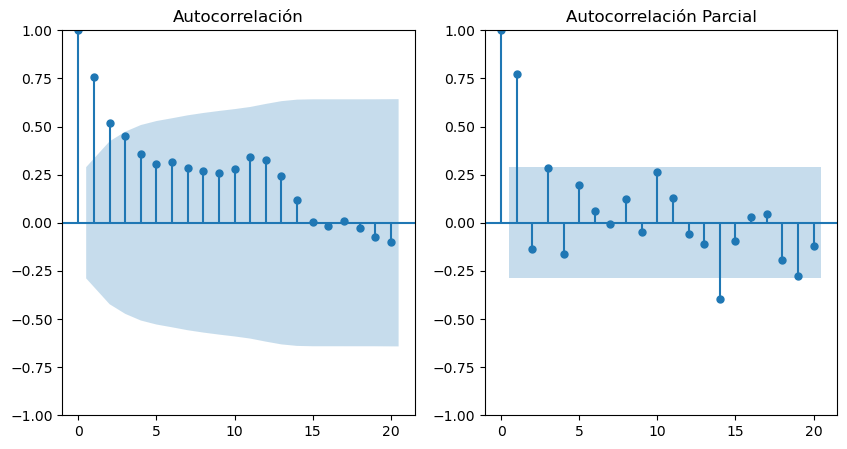

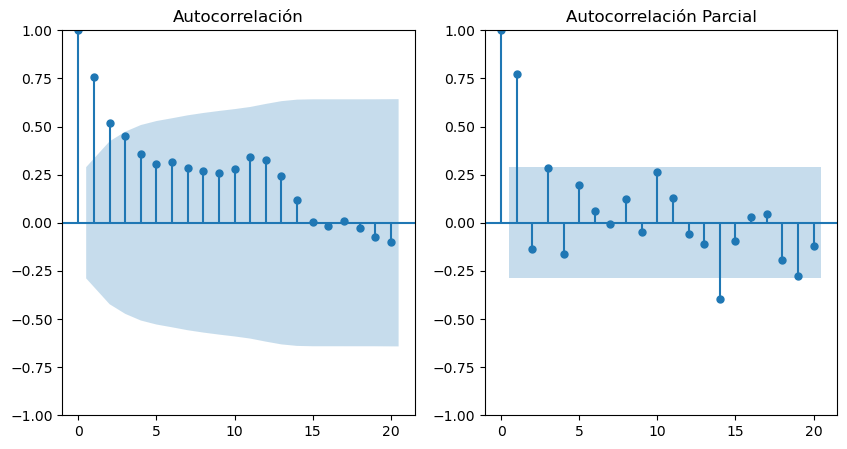

In [14]:
LAGS = 20

fig = plt.figure(figsize = (10, 5))

ax1, ax2 = fig.subplots(1, 2)

plot_acf(y, ax = ax1, lags = LAGS, title = "Autocorrelación")
plot_pacf(y, ax = ax2, lags = LAGS, title = "Autocorrelación Parcial")


In [15]:
serie_a_predecir = y

## Partición de entrenamiento y test de la serie

In [16]:
y_index = serie_a_predecir.index

date_train = int(len(y_index)*0.8)   # Se considero el 80% de los datos para entrenamiento

y_train = serie_a_predecir[y_index[:date_train]]
y_test = serie_a_predecir[y_index[date_train:len(y_index)]]

In [17]:
y_train.tail()

Primera fecha: Date
2021-08-01    15132451030
2021-09-01    10510413671
2021-10-01     5836622566
2021-11-01     8122244221
2021-12-01     7719862433
Name: Suma de TOTAL, dtype: int64

In [18]:
y_test.head()

Primera fecha: Date
2022-01-01    6877337079
2022-02-01    7195289853
2022-03-01    7309240662
2022-04-01    7286226681
2022-05-01    7070101309
Name: Suma de TOTAL, dtype: int64

In [19]:
# Para hacer el gridsearch, se definen los posibles valores para testear el modelo.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [20]:
seasonal_pdq = [(0, 0, 0, 0)]

In [21]:
st = time.time()

best_score = 0
best_params = None
best_seasonal_params = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            # guardamos el mejor resultado
            if best_score == 0:
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
                
            elif abs(results.aic) < abs(best_score):
                best_score = results.aic
                best_params = param
                best_seasonal_params = param_seasonal
            
        # alguna combinación de parámetros en SARIMAX, no son válidos
        # y los vamos a cazar con un except
        except:
            continue

et = time.time()

print("La búsqueda de parámetros no ha llevado {} minutos!".format((et - st)/60))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 0, 0)x(0, 0, 0, 0)12 - AIC:10924.398941962932
ARIMA(0, 0, 1)x(0, 0, 0, 0)12 - AIC:1605.8489018474284
ARIMA(0, 0, 2)x(0, 0, 0, 0)12 - AIC:1558.3064624388671
ARIMA(0, 1, 0)x(0, 0, 0, 0)12 - AIC:3882039375861796.0
ARIMA(0, 1, 1)x(0, 0, 0, 0)12 - AIC:1513.8244659459226
ARIMA(0, 1, 2)x(0, 0, 0, 0)12 - AIC:1464.5341132534877
ARIMA(0, 2, 0)x(0, 0, 0, 0)12 - AIC:20559.85459957337


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(0, 2, 1)x(0, 0, 0, 0)12 - AIC:1478.4911122540298
ARIMA(0, 2, 2)x(0, 0, 0, 0)12 - AIC:1422.4160570949714
ARIMA(1, 0, 0)x(0, 0, 0, 0)12 - AIC:1607.0478275261446
ARIMA(1, 0, 1)x(0, 0, 0, 0)12 - AIC:1552.3553204139528


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(1, 0, 2)x(0, 0, 0, 0)12 - AIC:1500.2854213175528
ARIMA(1, 1, 0)x(0, 0, 0, 0)12 - AIC:1562.1061751437662
ARIMA(1, 1, 1)x(0, 0, 0, 0)12 - AIC:1513.8365213969612
ARIMA(1, 1, 2)x(0, 0, 0, 0)12 - AIC:1466.1429528556419
ARIMA(1, 2, 0)x(0, 0, 0, 0)12 - AIC:1540.5679873094657
ARIMA(1, 2, 1)x(0, 0, 0, 0)12 - AIC:1480.1171777673408
ARIMA(1, 2, 2)x(0, 0, 0, 0)12 - AIC:1432.2945883338705


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(2, 0, 0)x(0, 0, 0, 0)12 - AIC:1563.8099829175897
ARIMA(2, 0, 1)x(0, 0, 0, 0)12 - AIC:54268991074995.31
ARIMA(2, 0, 2)x(0, 0, 0, 0)12 - AIC:1505.2671136085305
ARIMA(2, 1, 0)x(0, 0, 0, 0)12 - AIC:1509.7250003125482
ARIMA(2, 1, 1)x(0, 0, 0, 0)12 - AIC:1511.653277083789


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA(2, 1, 2)x(0, 0, 0, 0)12 - AIC:1467.1962868687697
ARIMA(2, 2, 0)x(0, 0, 0, 0)12 - AIC:1479.4005817528496
ARIMA(2, 2, 1)x(0, 0, 0, 0)12 - AIC:1471.1449058115606
ARIMA(2, 2, 2)x(0, 0, 0, 0)12 - AIC:1426.4284466529948
La búsqueda de parámetros no ha llevado 0.020296629269917807 minutos!


In [48]:
print("El mejor modelo es {}, \nCon un AIC de {}".format(best_params, best_score))

El mejor modelo es (0, 2, 2), 
Con un AIC de 1422.4160570949714


In [49]:
# Entrenamos el modelo con los mejores parametros.

mod = sm.tsa.statespace.SARIMAX(y_train,
                                order = best_params,
                                seasonal_order = param_seasonal,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9338      0.026    -73.871      0.000      -1.985      -1.882
ma.L2          1.0597      0.031     34.305      0.000       0.999       1.120
sigma2      5.903e+18        nan        nan        nan         nan         nan


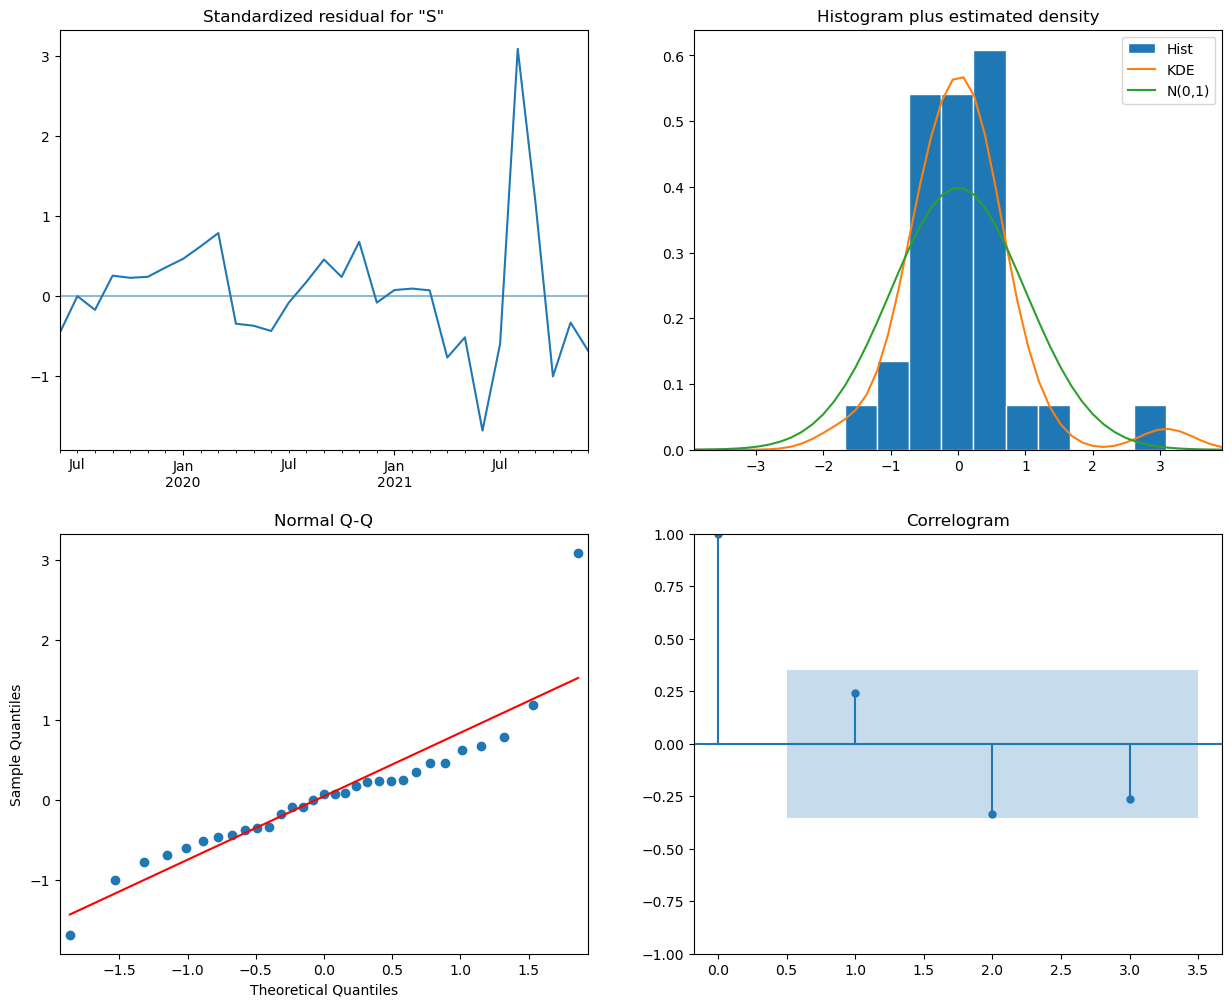

In [51]:
results.plot_diagnostics(figsize = (15, 12), lags = 3);

In [52]:
pred_uc = results.get_forecast(steps = len(y_test))

# Calcula el intervalo de confianza de la predicción.
pred_ci = pred_uc.conf_int()

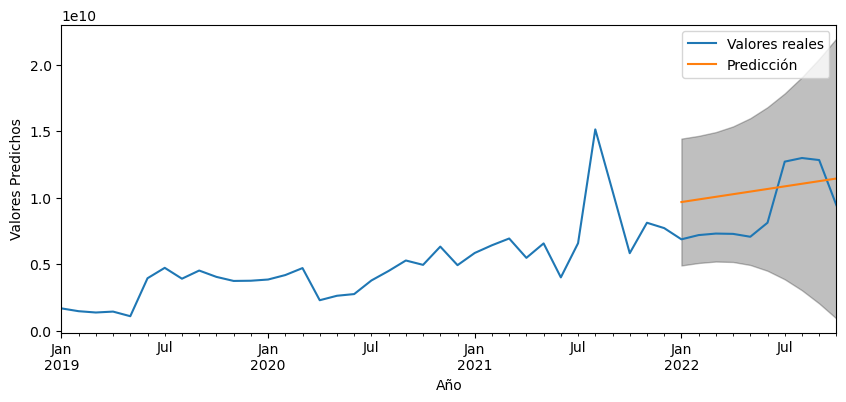

In [60]:
ax = serie_a_predecir.plot(label = 'Valores reales', figsize = (10, 4))

pred_uc.predicted_mean.plot(ax = ax, label = 'Predicción')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)

ax.set_xlabel('Año')
ax.set_ylabel('Valores Predichos')

plt.legend()
plt.show()

In [62]:
y_pred = pred_ci.iloc[:, 0]
#y_pred

In [57]:
# El RMSE es de 2.52
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))

print("El modelo ARIMA con los parametros {}, ha dado un rmse en test de {}".format(best_params, round(rmse, 2)))

El modelo ARIMA con los parametros (0, 2, 2), ha dado un rmse en test de 6322403874.39


In [69]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          Suma de TOTAL   No. Observations:                   36
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -708.208
Date:                Tue, 10 Jan 2023   AIC                           1422.416
Time:                        16:17:00   BIC                           1426.718
Sample:                    01-01-2019   HQIC                          1423.818
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9338      0.026    -73.871      0.000      -1.985      -1.882
ma.L2          1.0597      0.031     34.305      0.000       0.999       1.120
sigma2      5.903e+18        nan        nan        n